# Dataset Information
This dataset comprises comprehensive health information for 2,105 patients diagnosed with Parkinson's Disease, each uniquely identified with IDs ranging from 3058 to 5162. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis indicator. This dataset is valuable for researchers and data scientists aiming to explore factors associated with Parkinson's Disease, develop predictive models, and conduct statistical analyses.

### Patient Information

* PatientID: A unique identifier assigned to each patient (3058 to 516)s indicate greater impairment.

### Demographic Details
* Age: The age of the patients ranges from 50 to 90 years.
* Gender: Gender of the patients, where 0 represents Male and 1 represents Females

#### Ethnicity: The ethnicity of the patients, coded as follow-:
* 0: Caucasian
* 1: African American
* 2: Asian
* 3: Other

#### EducationLevel: The education level of the patients, coded as follows:
* 0: None
* 1: High School
* 2 : Bachelor's
* 3 : Higher

### Symptoms

* Tremor: Presence of tremor, where 0 indicates No and 1 indicates Yes.
* Rigidity: Presence of muscle rigidity, where 0 indicates No and 1 indicates Yes.
* Bradykinesia: Presence of bradykinesia (slowness of movement), where 0 indicates No and 1 indicates Yes.
* PosturalInstability: Presence of postural instability, where 0 indicates No and 1 indicates Yes.
* SpeechProblems: Presence of speech problems, where 0 indicates No and 1 indicates Yes.
* SleepDisorders: Presence of sleep disorders, where 0 indicates No and 1 indicates Yes.
* Constipation: Presence of constipation, where 0 indicates No and 1 indicates Yes.
  
### Lifestyle factors
* BMI: Body Mass Index of the patients, ranging from 15 to 40.
* Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
* AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
* PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
* DietQuality: Diet quality score, ranging from 0 to 10.
* SleepQuality: Sleep quality score, ranging from 4 to 10.
  
### Medical History
* FamilyHistoryParkinsons: Family history of Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
* TraumaticBrainInjury: History of traumatic brain injury, where 0 indicates No and 1 indicates Yes.
* Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
* Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
* Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
* Stroke: History of stroke, where 0 indicates No and 1 indicates Yes.
  
### Clinical Measurements
* SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
* DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
* CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
* CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
* CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
* CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

### Cognitive and Functional Assessments
* UPDRS: Unified Parkinson's Disease Rating Scale score, ranging from 0 to 199. Higher scores indicate greater severity of the disease.
* MoCA: Montreal Cognitive Assessment score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
* FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance

In [5]:
pd.set_option('display.max_rows', None)  # To display all rows 
pd.set_option('display.max_columns', None)  # To display all columns

In [6]:
from IPython.display import HTML
HTML('<style>div.output_scroll {height: 400px; overflow-y: scroll;}</style>')

In [7]:
data=pd.read_csv('parkinsons_disease_data.csv')

In [8]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [9]:
data.shape

(2105, 35)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2105.0,4110.000000,607.805479,3058.000000,3584.000000,4110.000000,4636.000000,5162.000000
Age,2105.0,69.601900,11.594511,50.000000,60.000000,70.000000,80.000000,89.000000
Gender,2105.0,0.492637,0.500065,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2105.0,0.692637,1.003827,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2105.0,1.337292,0.895840,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2105.0,27.209493,7.208099,15.008333,20.782176,27.184571,33.462452,39.999887
Smoking,2105.0,0.296437,0.456795,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2105.0,10.040413,5.687014,0.002228,5.150278,10.070337,14.829565,19.988866
PhysicalActivity,2105.0,5.016674,2.890919,0.004157,2.455703,5.031550,7.512795,9.995255
DietQuality,2105.0,4.912901,2.872115,0.000011,2.478503,4.825187,7.381487,9.995864


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [12]:
data.shape

(2105, 35)

In [13]:
data.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

In [14]:
numerical_col=[
    'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS',
    'MoCA', 'FunctionalAssessment','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality'
]

In [15]:
numerical_col

['Age',
 'BMI',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'UPDRS',
 'MoCA',
 'FunctionalAssessment',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality']

In [16]:
data[numerical_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2105.0,69.601900,11.594511,50.000000,60.000000,70.000000,80.000000,89.000000
BMI,2105.0,27.209493,7.208099,15.008333,20.782176,27.184571,33.462452,39.999887
SystolicBP,2105.0,133.719715,26.502355,90.000000,110.000000,133.000000,157.000000,179.000000
DiastolicBP,2105.0,90.249881,17.061488,60.000000,75.000000,91.000000,105.000000,119.000000
CholesterolTotal,2105.0,226.860840,43.589406,150.062698,189.385178,228.528256,264.608100,299.963074
CholesterolLDL,2105.0,126.147858,43.407036,50.022828,88.841960,126.884570,163.912782,199.985981
CholesterolHDL,2105.0,59.670352,23.370920,20.027981,39.538643,59.343357,79.366628,99.982265
CholesterolTriglycerides,2105.0,222.940500,101.895822,50.113604,132.520174,222.802452,311.699109,399.975022
UPDRS,2105.0,101.415318,56.591448,0.028441,53.048148,102.561023,149.831682,198.953604
MoCA,2105.0,15.094314,8.643014,0.021191,7.517160,14.963574,22.608362,29.970107


In [17]:
data = data.drop(columns=['DoctorInCharge','PatientID'])

In [18]:
categorical_col = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryParkinsons',
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
    'SleepDisorders', 'Constipation'
]

In [19]:
categorical_col

['Gender',
 'Ethnicity',
 'EducationLevel',
 'Smoking',
 'FamilyHistoryParkinsons',
 'TraumaticBrainInjury',
 'Hypertension',
 'Diabetes',
 'Depression',
 'Stroke',
 'Tremor',
 'Rigidity',
 'Bradykinesia',
 'PosturalInstability',
 'SpeechProblems',
 'SleepDisorders',
 'Constipation']

In [20]:
len(numerical_col)

15

In [21]:
data[categorical_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,2105.0,0.492637,0.500065,0.0,0.0,0.0,1.0,1.0
Ethnicity,2105.0,0.692637,1.003827,0.0,0.0,0.0,1.0,3.0
EducationLevel,2105.0,1.337292,0.895840,0.0,1.0,1.0,2.0,3.0
Smoking,2105.0,0.296437,0.456795,0.0,0.0,0.0,1.0,1.0
FamilyHistoryParkinsons,2105.0,0.145843,0.353033,0.0,0.0,0.0,0.0,1.0
TraumaticBrainInjury,2105.0,0.106413,0.308439,0.0,0.0,0.0,0.0,1.0
Hypertension,2105.0,0.145843,0.353033,0.0,0.0,0.0,0.0,1.0
Diabetes,2105.0,0.148219,0.355401,0.0,0.0,0.0,0.0,1.0
Depression,2105.0,0.205226,0.403962,0.0,0.0,0.0,0.0,1.0
Stroke,2105.0,0.048931,0.215775,0.0,0.0,0.0,0.0,1.0


In [22]:
for col in categorical_col:
    unique_values = data[col].unique()
    print(f'Unique values in {col}: {unique_values}')

Unique values in Gender: [0 1]
Unique values in Ethnicity: [3 0 2 1]
Unique values in EducationLevel: [1 2 0 3]
Unique values in Smoking: [0 1]
Unique values in FamilyHistoryParkinsons: [0 1]
Unique values in TraumaticBrainInjury: [0 1]
Unique values in Hypertension: [0 1]
Unique values in Diabetes: [0 1]
Unique values in Depression: [0 1]
Unique values in Stroke: [0 1]
Unique values in Tremor: [1 0]
Unique values in Rigidity: [0 1]
Unique values in Bradykinesia: [0 1]
Unique values in PosturalInstability: [0 1]
Unique values in SpeechProblems: [0 1]
Unique values in SleepDisorders: [0 1]
Unique values in Constipation: [0 1]


- There is no requirement of label encoding as everything already is encoded in binary.

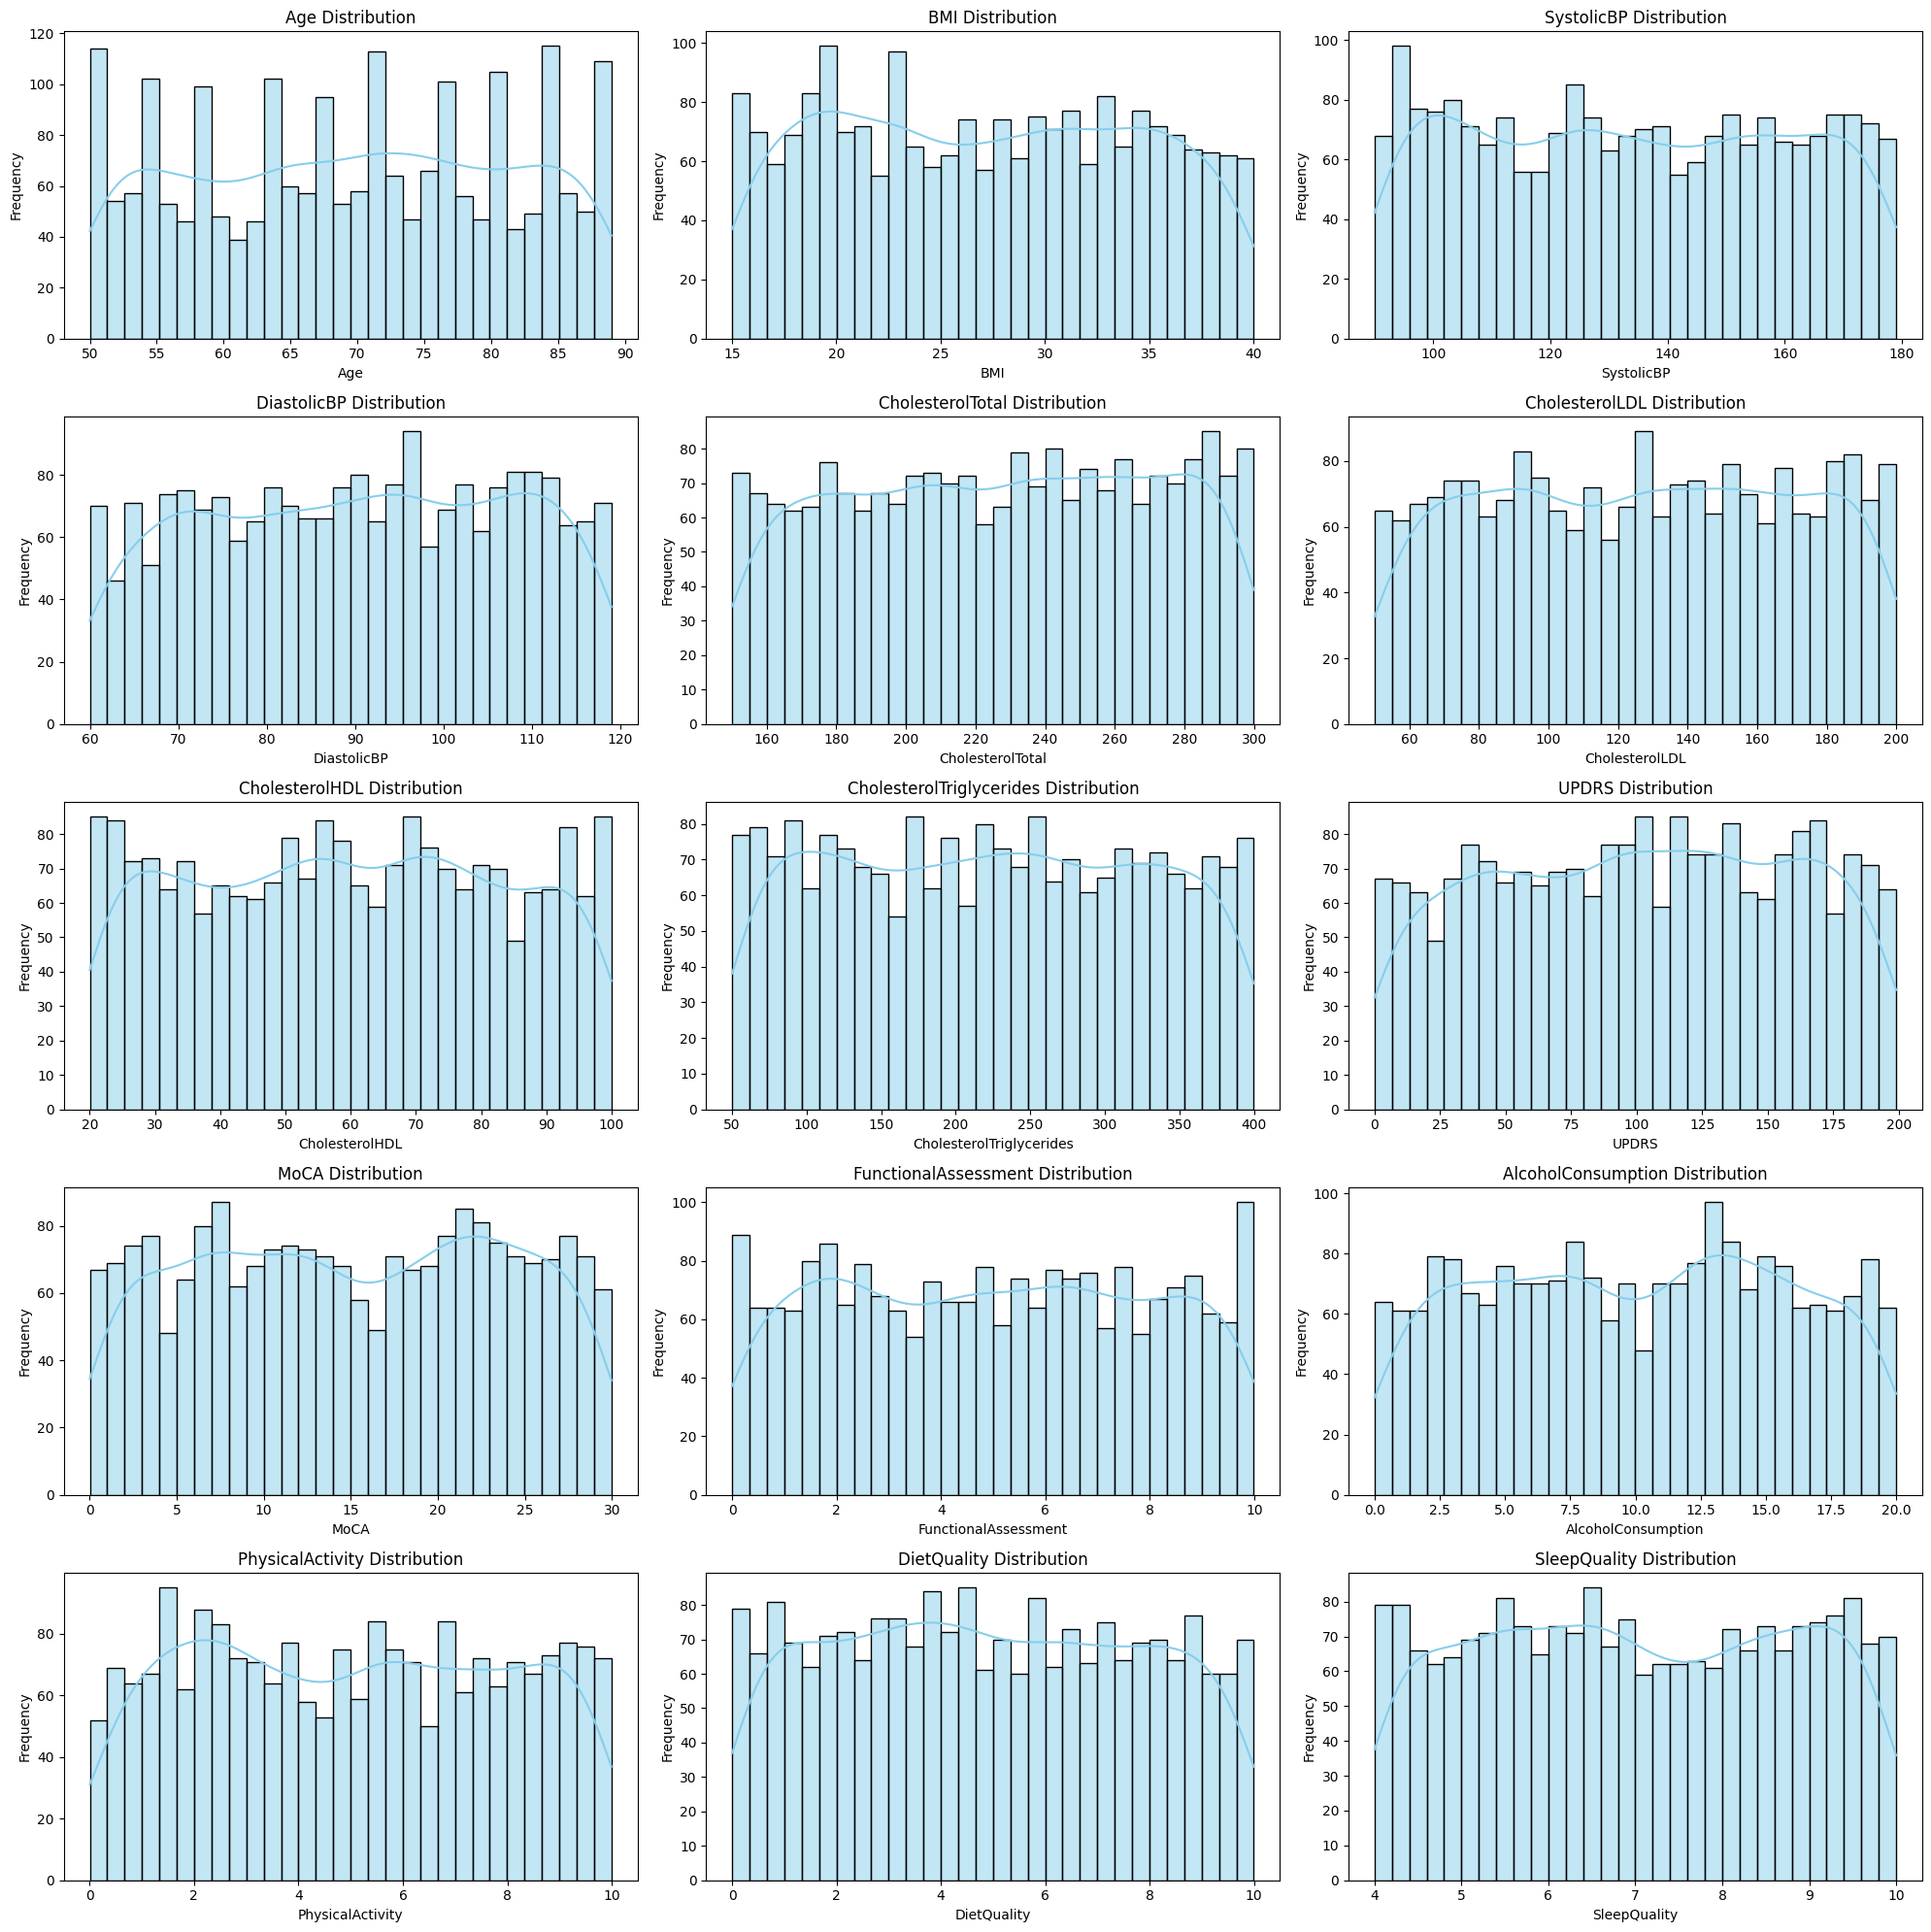

In [23]:
# Set the figure size for better visibility
plt.figure(figsize=(20, 20))

# Loop through each numerical column and create subplots
for i, col in enumerate(numerical_col):
    plt.subplot(5, 3, i + 1)  # Using 4 rows and 3 columns, fitting 12 plots
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')  # Adding color for better visualization
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

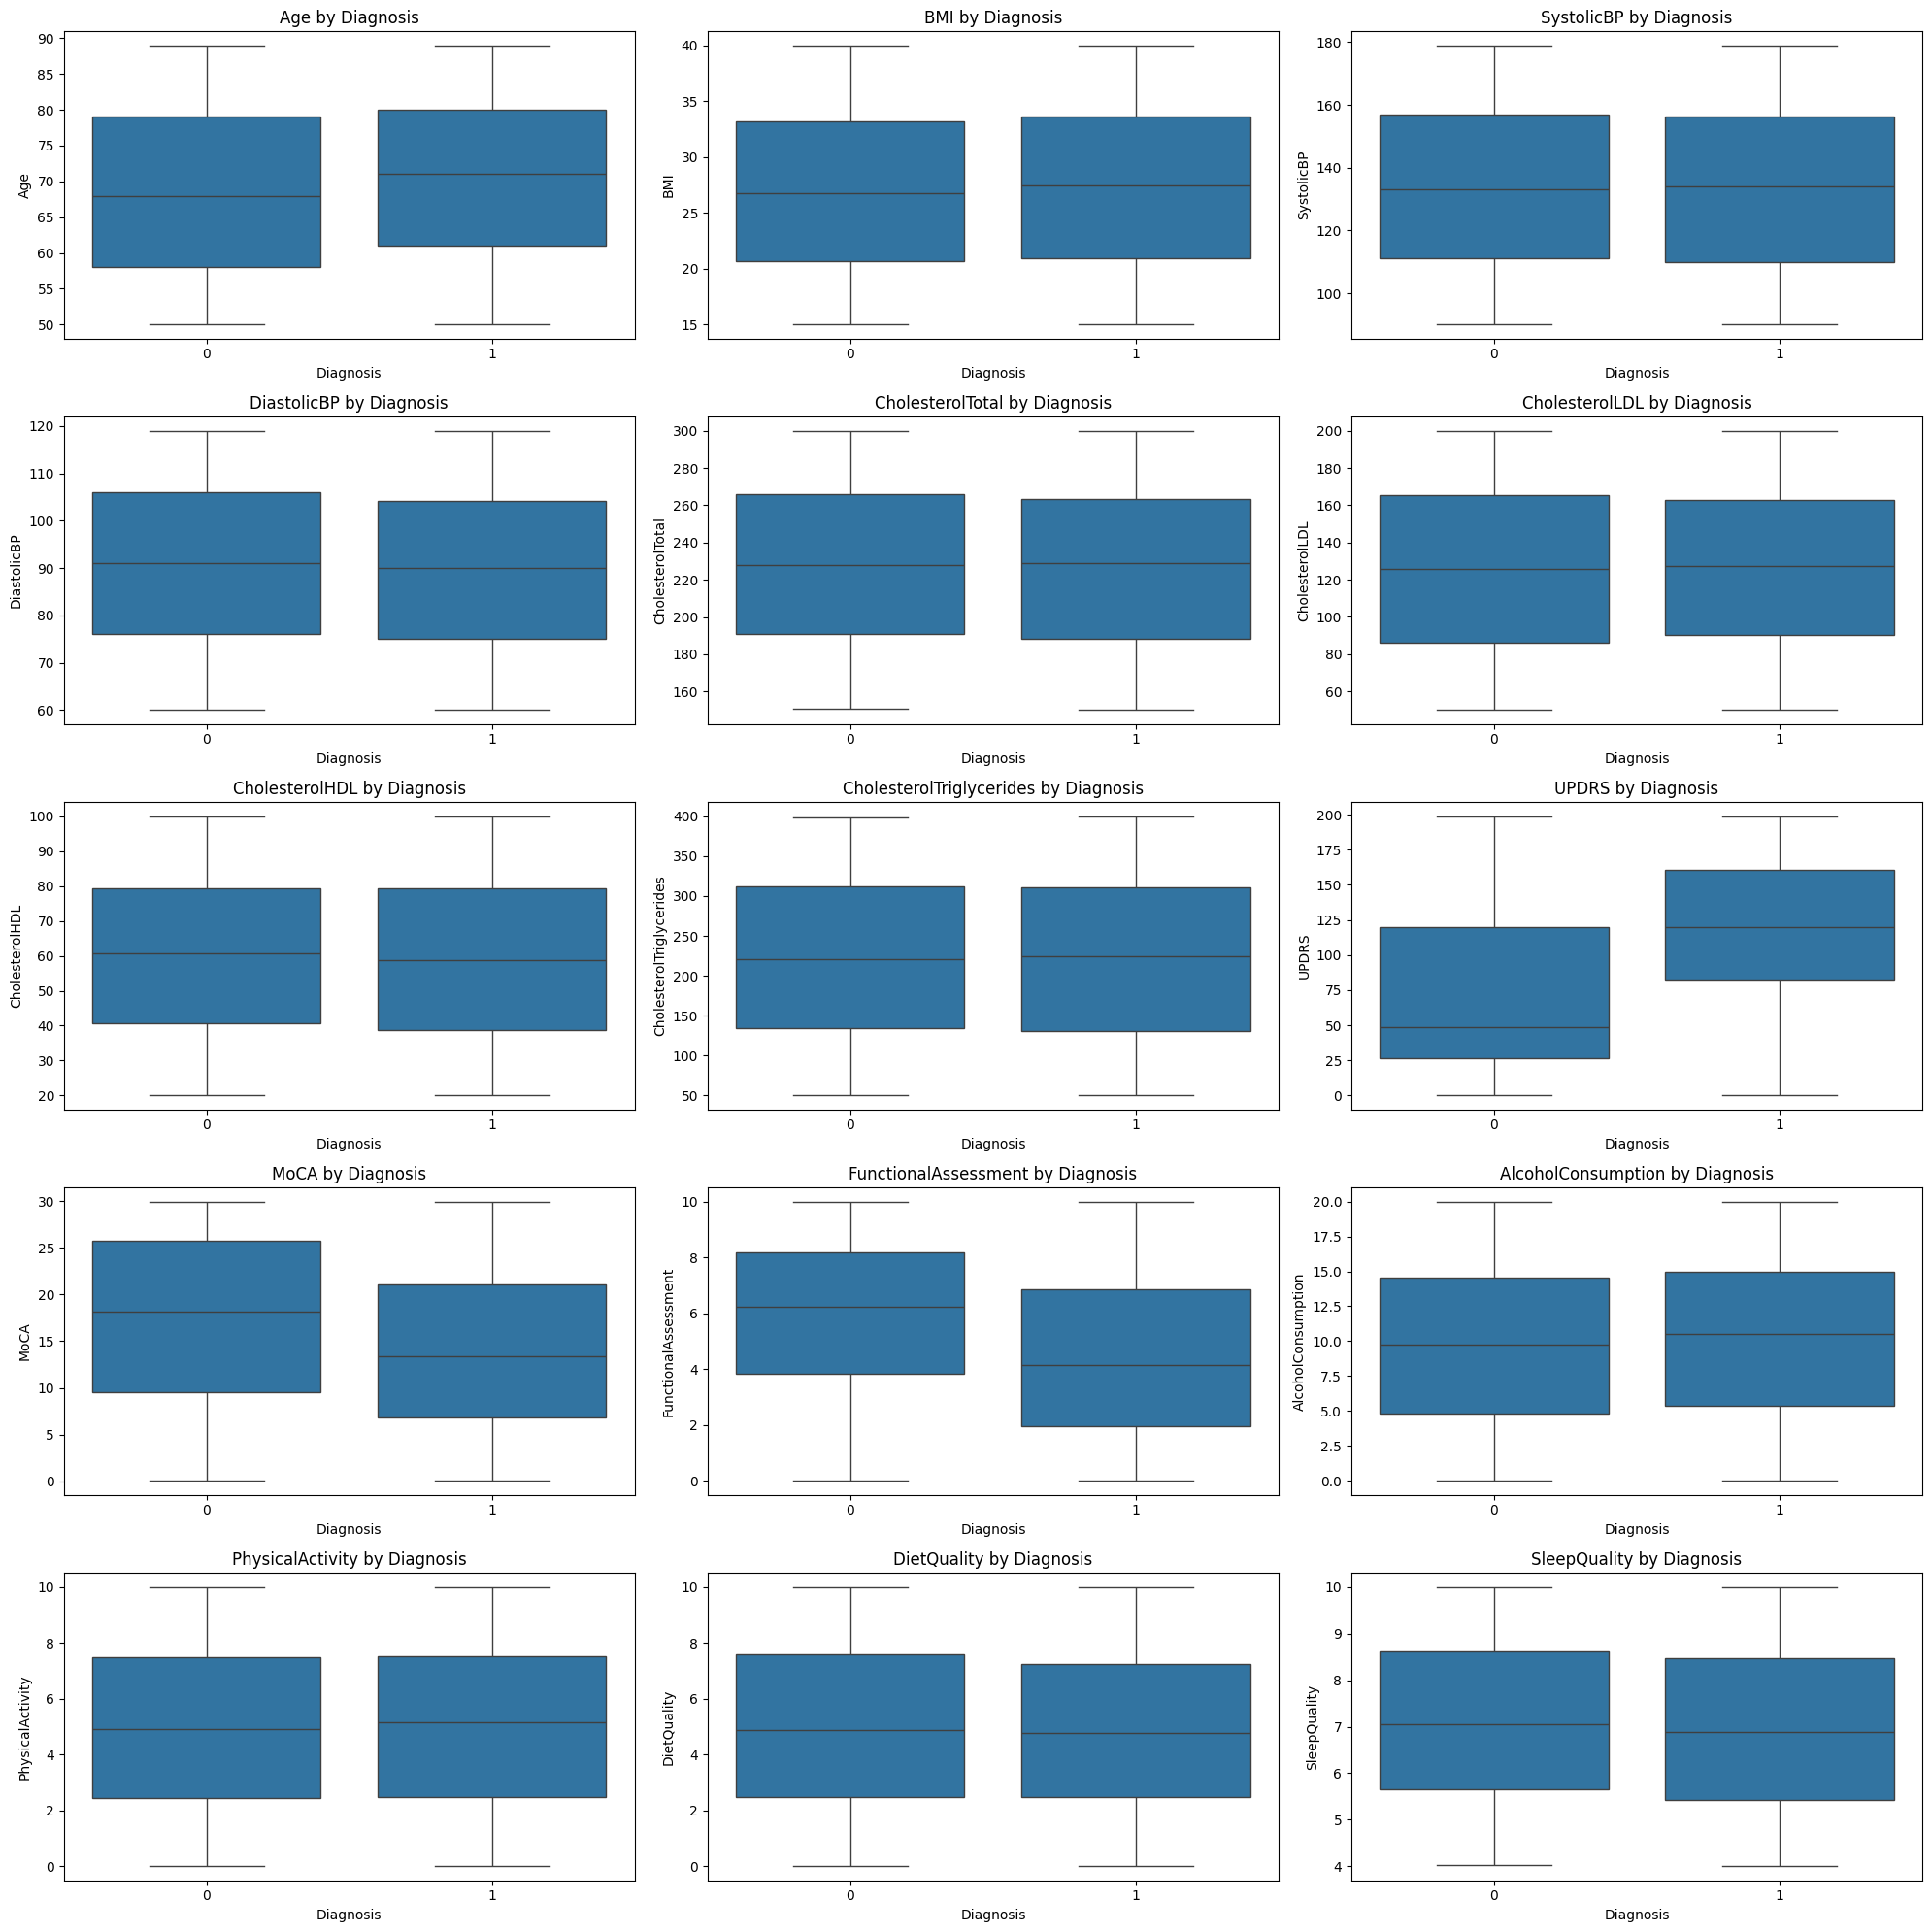

In [24]:
# Box plots for numerical features grouped by Diagnosis
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x='Diagnosis', y=col, data=data)
    plt.title(f'{col} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

- No outlier Present in the dataset

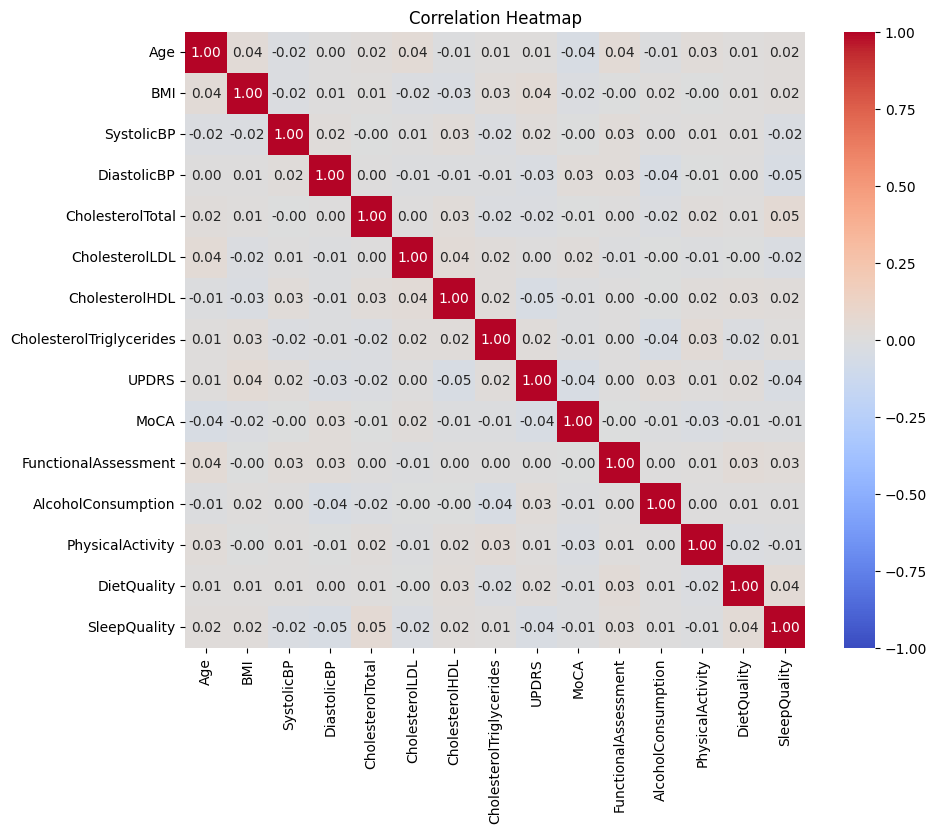

In [25]:
correlation_matrix = data[numerical_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
# Correlation between the numerical variables and diagnosis
correlation_results={}

#calculating point biserial correlation for each feature
for feature in numerical_col:
    correlation,p_value=pointbiserialr(data['Diagnosis'],data[feature])
    correlation_results[feature]=correlation
    

In [27]:
#convert the result into dataframe
corr_df=pd.DataFrame(list(correlation_results.items()),columns=['feature','Correlation'])

diagnosis_correlation = pd.DataFrame({'Feature': ['Diagnosis'], 'Correlation': [1]})
corr_df = pd.concat([corr_df, diagnosis_correlation], ignore_index=True)

In [28]:
#correlatation matrix creation
corr_matrix=pd.DataFrame(correlation_results.values(),index=numerical_col,columns=['Correlation'])
corr_df['Correlation'].values[:-1]
corr_matrix=corr_matrix.transpose()
corr_matrix


,Age,BMI,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality
Correlation,0.065344,0.030114,-0.004413,-0.029074,-0.019001,0.014707,-0.019626,0.01561,0.398006,-0.173104,-0.225036,0.036699,0.01294,-0.022992,-0.043295


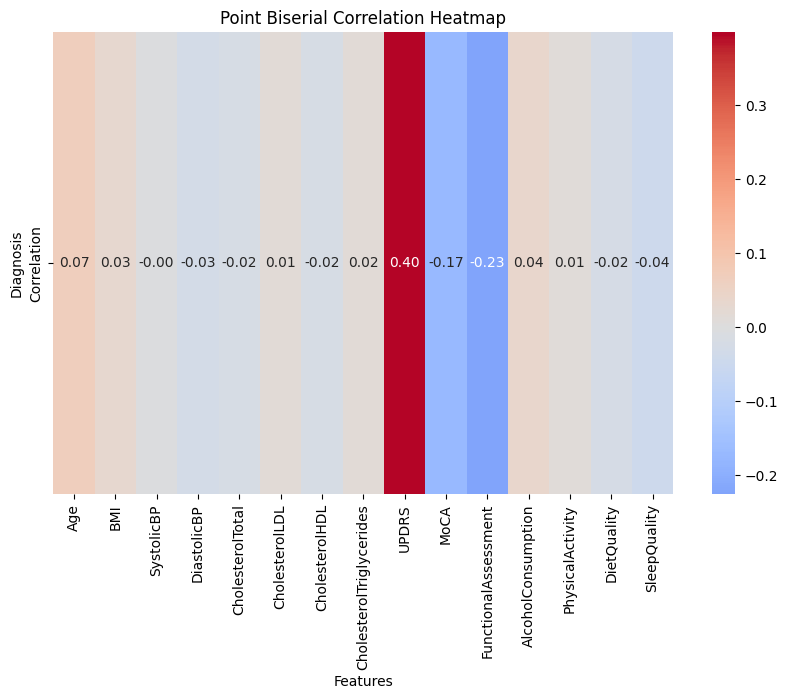

In [29]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",center=0)
plt.title("Point Biserial Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Diagnosis")
plt.show()

# General Trends

### 1. Distribution of Diagnosis across age group

In [30]:
#Presence of the disease among different age groups
new_df=data[['Age','Diagnosis']].copy()

#create bins for creating 
bins=[50,60,70,80,90]
labels=['50-60','61-70','71-80','81-90']
new_df['AgeGroup']=pd.cut(new_df['Age'],bins=bins,labels=labels,right=False)
new_df.head()

,Age,Diagnosis,AgeGroup
0,85,0,81-90
1,75,1,71-80
2,70,1,71-80
3,52,1,50-60
4,87,0,81-90


([0, 1, 2, 3],
 [Text(0, 0, '50-60'),
  Text(1, 0, '61-70'),
  Text(2, 0, '71-80'),
  Text(3, 0, '81-90')])

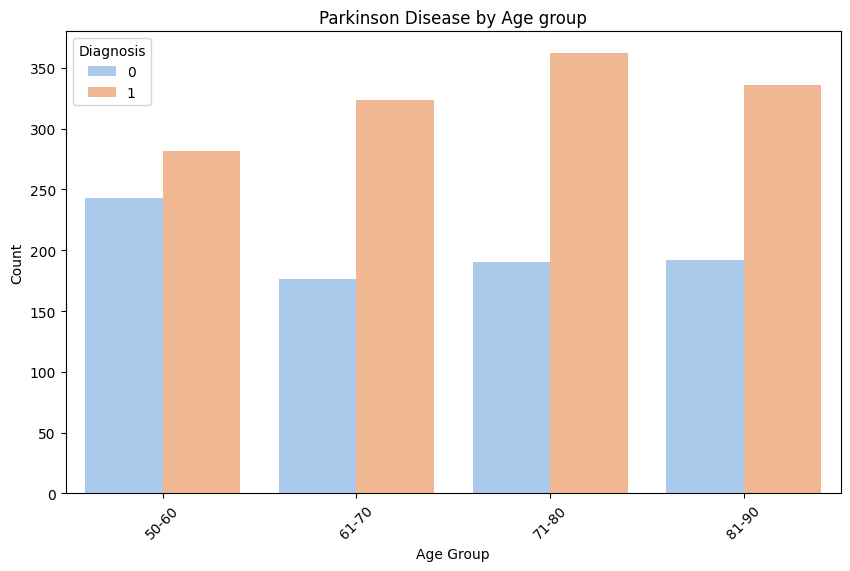

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='AgeGroup',hue='Diagnosis',data=new_df,palette='pastel')
plt.title('Parkinson Disease by Age group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)


### 2. Distribution of Diagnosis by Gender

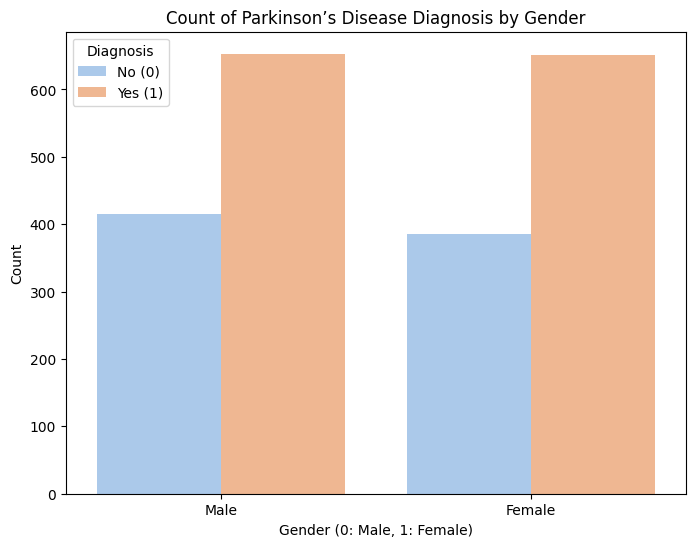

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Diagnosis', data=data, palette='pastel')
plt.title('Count of Parkinson’s Disease Diagnosis by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Diagnosis', labels=['No (0)', 'Yes (1)'])
plt.show()

### 3. Lifestyle factor influence on Diagnosis

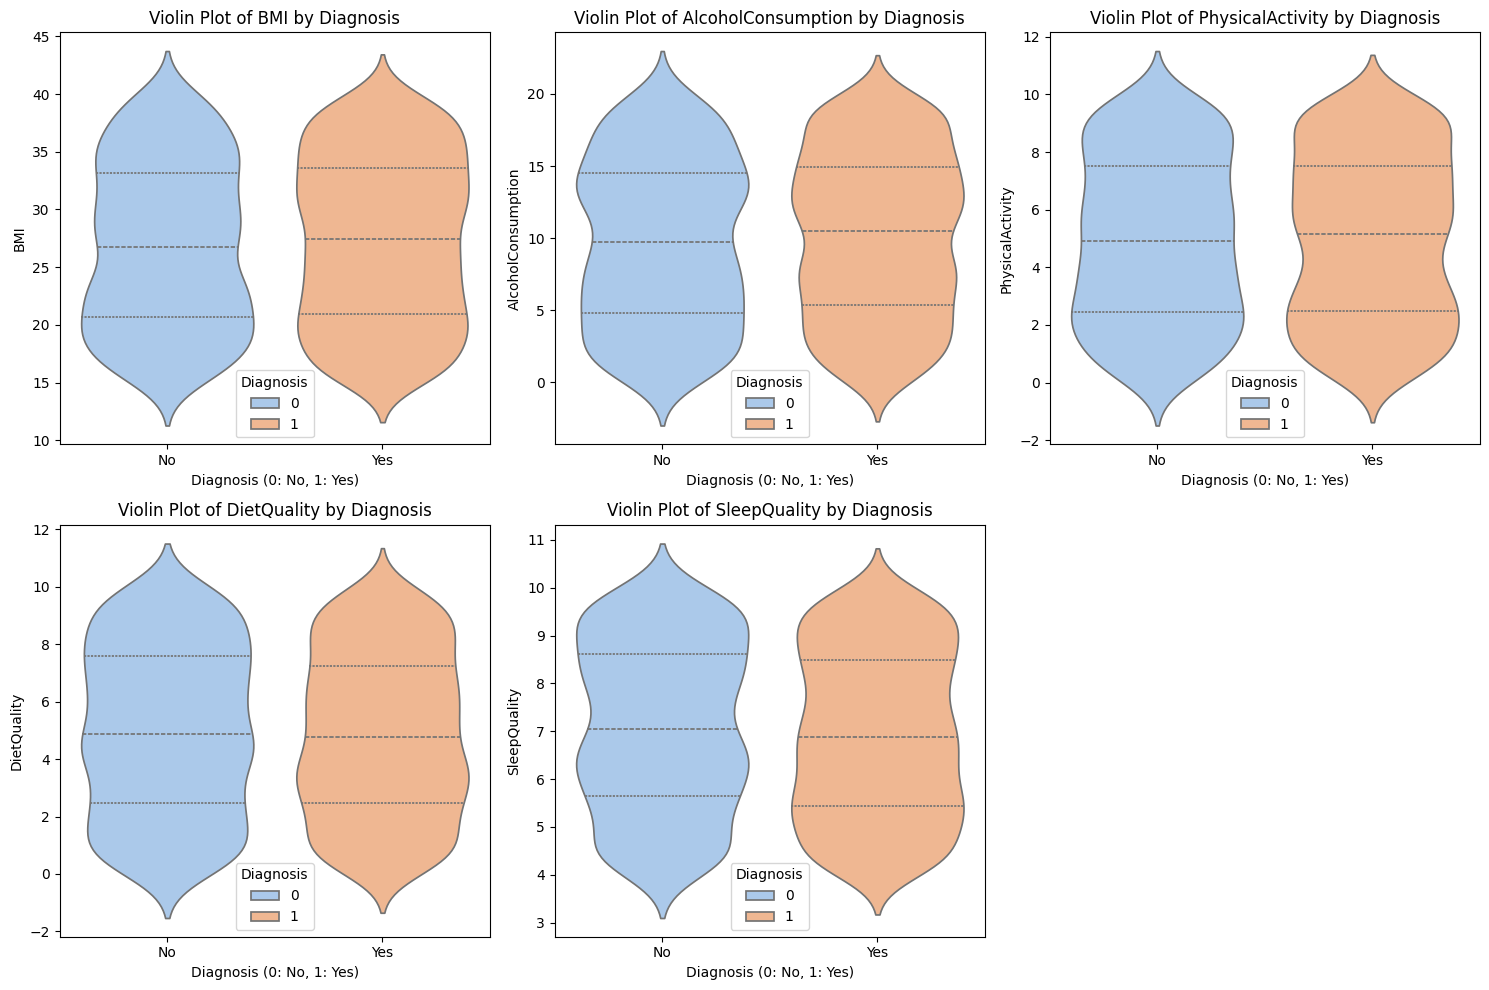

In [33]:
lifestyle_factors = ['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']


plt.figure(figsize=(15, 10))

for i, factor in enumerate(lifestyle_factors):
    plt.subplot(2, 3, i + 1) 
    sns.violinplot(x='Diagnosis', y=factor, data=data,hue='Diagnosis', palette='pastel', inner='quartile')
    plt.title(f'Violin Plot of {factor} by Diagnosis')
    plt.xlabel('Diagnosis (0: No, 1: Yes)')
    plt.ylabel(factor)
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.tight_layout() 
plt.show()

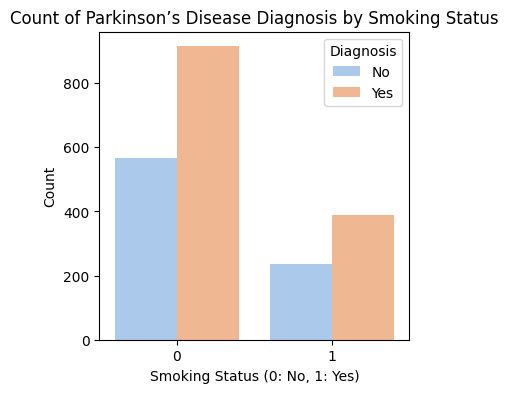

In [34]:
smoking_counts = data.groupby(['Smoking', 'Diagnosis']).size()

plt.figure(figsize=(4, 4))
sns.countplot(x='Smoking',hue='Diagnosis',data=data,palette='pastel')
plt.title("Count of Parkinson’s Disease Diagnosis by Smoking Status")
plt.xlabel("Smoking Status (0: No, 1: Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Diagnosis', labels=['No', 'Yes'])
plt.show()

In [35]:
#categorical columns divided into different categories 
symptoms=['Tremor','Rigidity','Bradykinesia','PosturalInstability','SpeechProblems','SleepDisorders','Constipation']
medical_history=['FamilyHistoryParkinsons','TraumaticBrainInjury','Hypertension','Diabetes','Depression','Stroke']


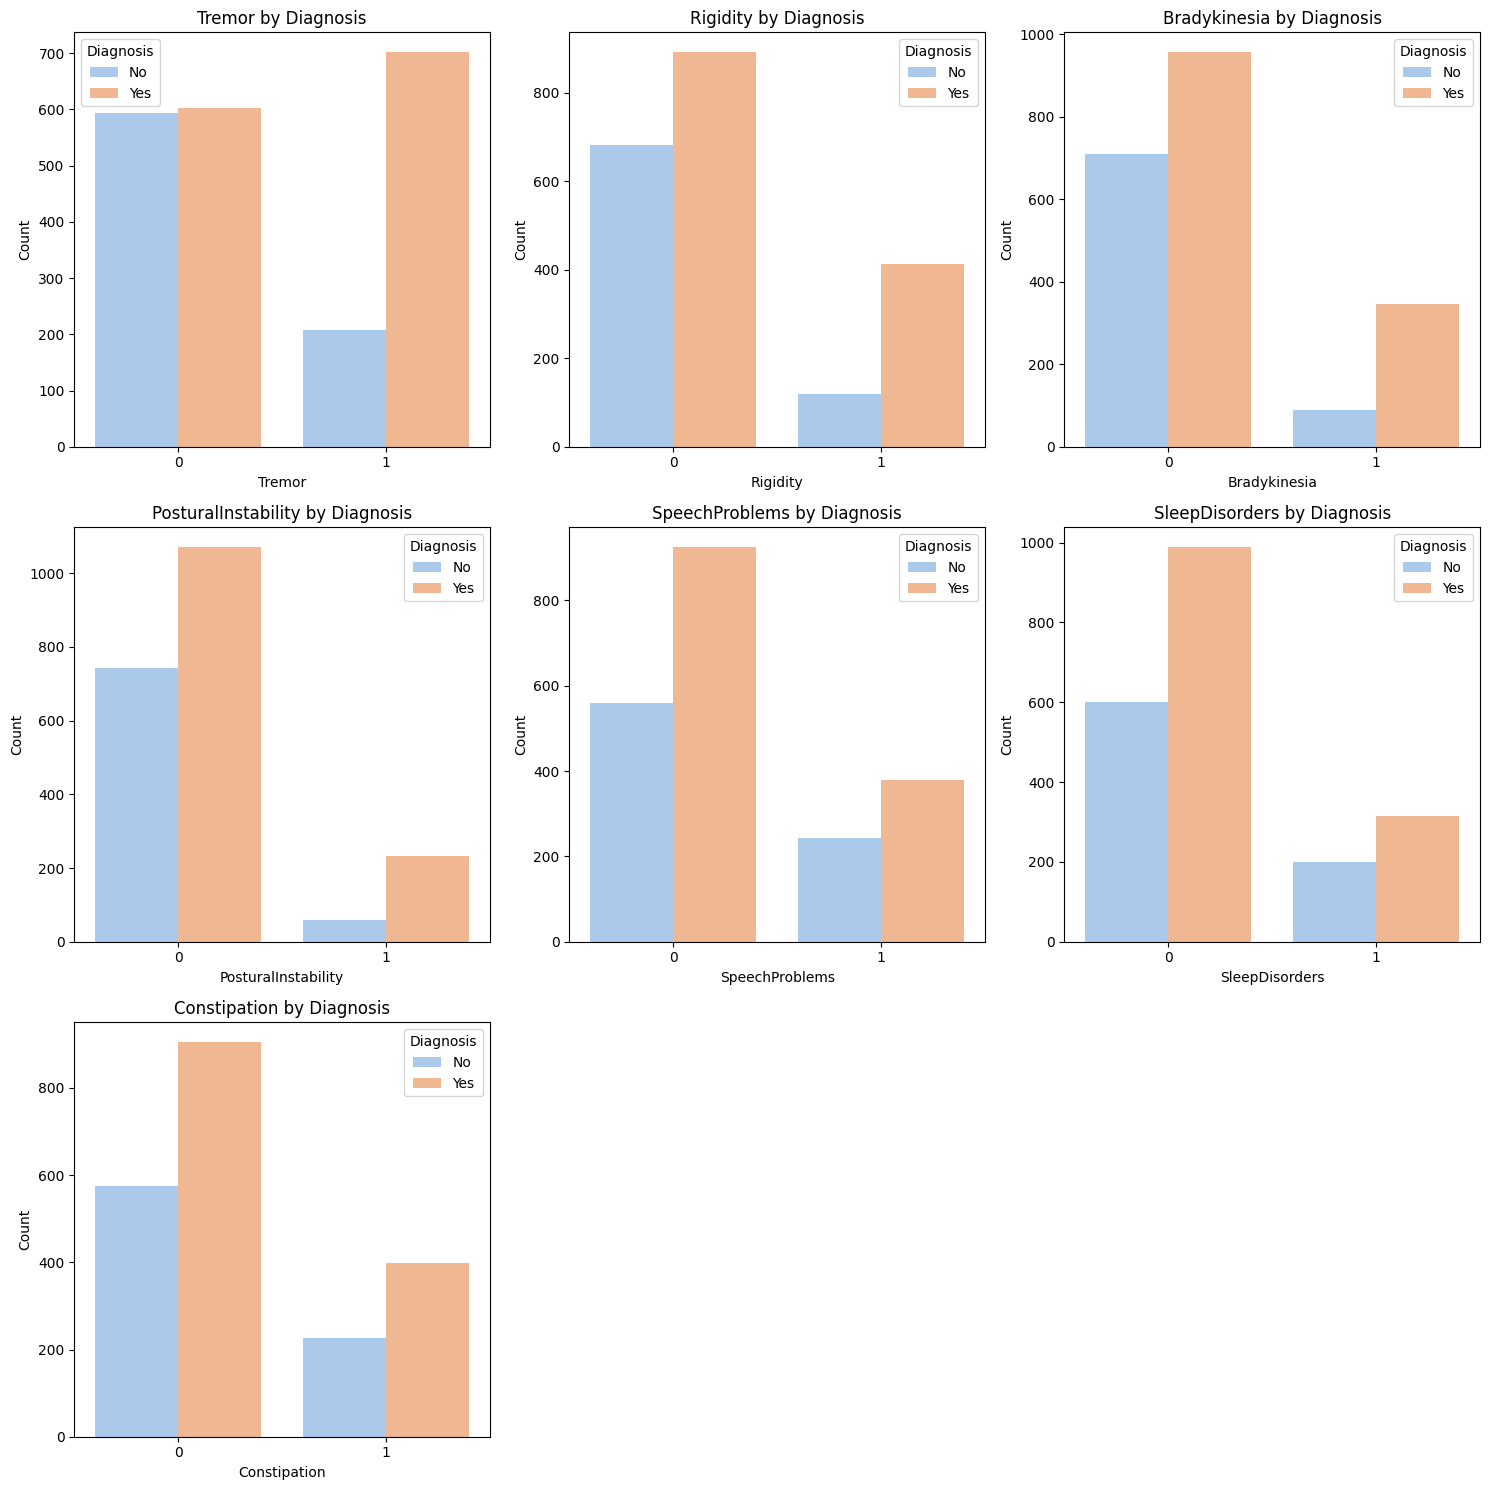

In [36]:
#Symptoms by Diagnosis
plt.figure(figsize=(15,15))
for i ,factor in enumerate(symptoms):
    plt.subplot(3,3,i+1)
    sns.countplot(x=factor,hue='Diagnosis',data=data,palette='pastel')
    plt.title(f'{factor} by Diagnosis')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis',labels=['No','Yes'])

plt.tight_layout()
plt.show()

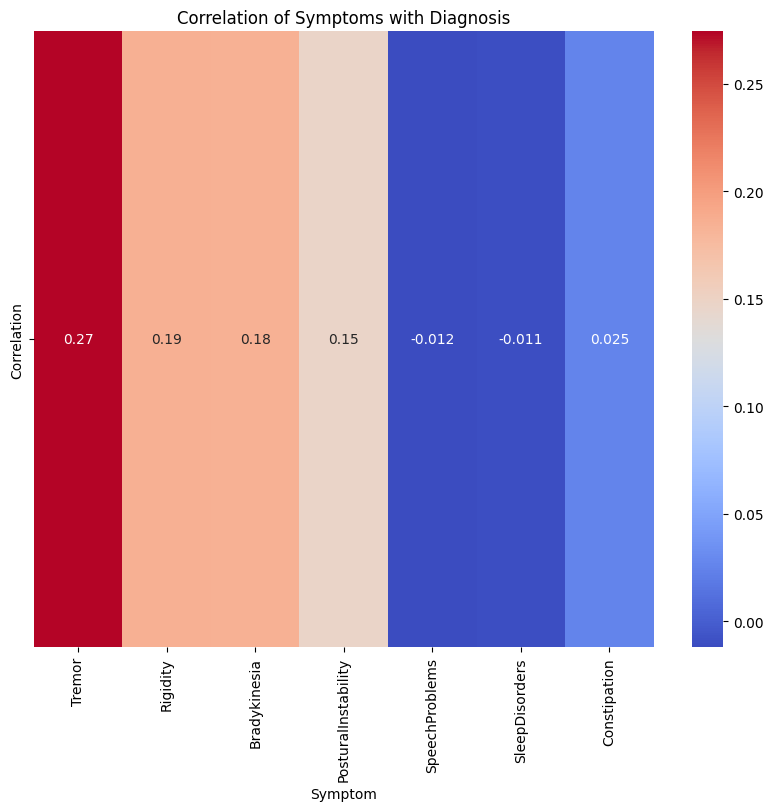

In [37]:
#Heatmap for symtpom and diagnosis
correlation_values = []
for factor in symptoms:
    correlation, _ = pointbiserialr(data['Diagnosis'], data[factor])
    correlation_values.append(correlation)

corr_df = pd.DataFrame({
    'Symptom': symptoms,
    'Correlation': correlation_values
})

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.set_index('Symptom').T, annot=True, cmap="coolwarm")
plt.title("Correlation of Symptoms with Diagnosis")
plt.show()

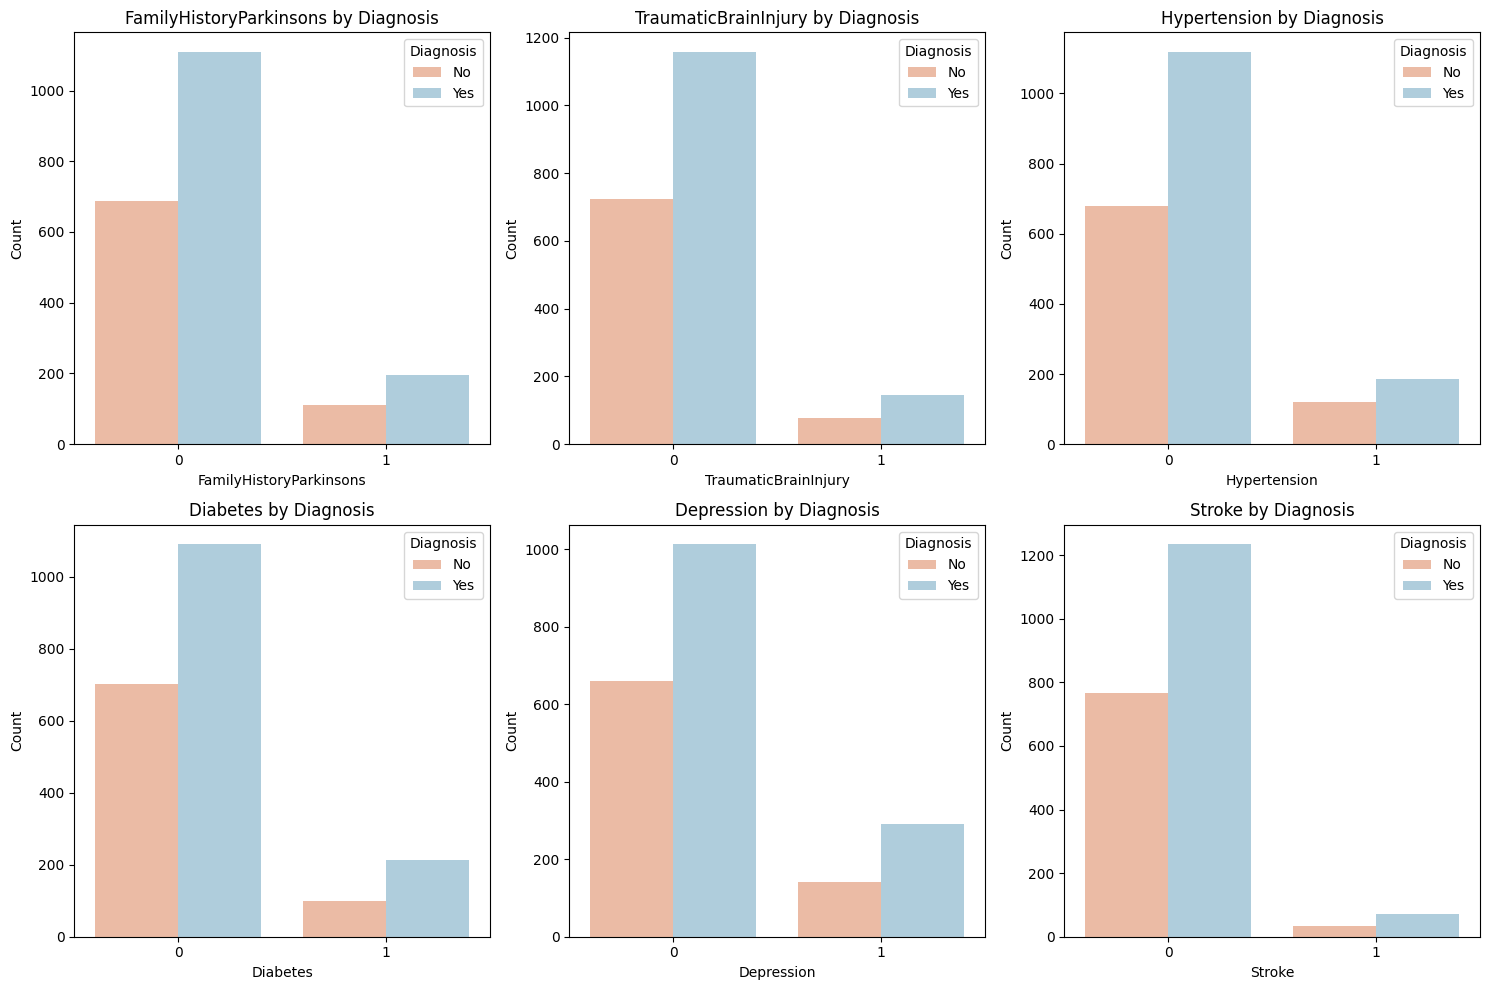

In [38]:
#Medical History by Diagnosis
plt.figure(figsize=(15,10))
for i ,factor in enumerate(medical_history):
    plt.subplot(2,3,i+1)
    sns.countplot(x=factor,hue='Diagnosis',data=data,palette='RdBu')
    plt.title(f'{factor} by Diagnosis')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis',labels=['No','Yes'])

plt.tight_layout()
plt.show()

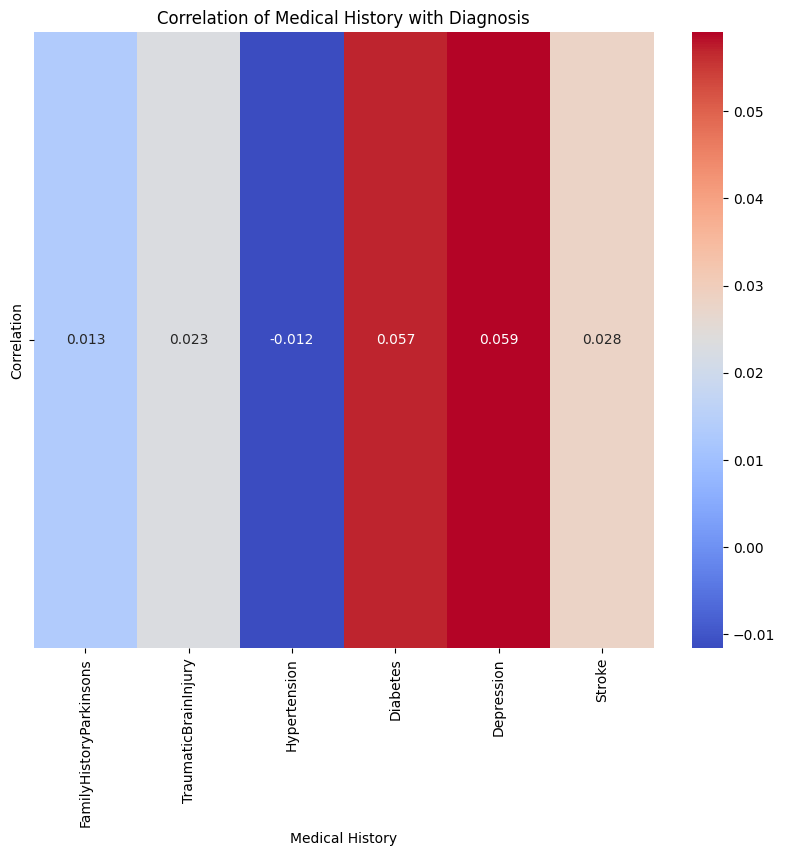

In [39]:
#Heatmap for Medical History and diagnosis
correlation_values = []
for factor in medical_history:
    correlation,_ = pointbiserialr(data['Diagnosis'], data[factor])
    correlation_values.append(correlation)

corr_df = pd.DataFrame({
    'Medical History': medical_history,
    'Correlation': correlation_values
})

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.set_index('Medical History').T, annot=True, cmap="coolwarm")
plt.title("Correlation of Medical History with Diagnosis")
plt.show()

In [40]:
X = data.drop('Diagnosis', axis=1) 
y = data['Diagnosis']

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
print('Mean:',scaler.mean_)
print('Scale:',scaler.scale_)

Mean: [6.96019002e+01 4.92636580e-01 6.92636580e-01 1.33729216e+00
 2.72094928e+01 2.96437055e-01 1.00404130e+01 5.01667445e+00
 4.91290077e+00 6.99663884e+00 1.45843230e-01 1.06413302e-01
 1.45843230e-01 1.48218527e-01 2.05225653e-01 4.89311164e-02
 1.33719715e+02 9.02498812e+01 2.26860840e+02 1.26147858e+02
 5.96703515e+01 2.22940500e+02 1.01415318e+02 1.50943135e+01
 4.98969419e+00 4.31828979e-01 2.52731591e-01 2.07600950e-01
 1.38717340e-01 2.95011876e-01 2.45130641e-01 2.96912114e-01]
Scale: [ 11.59175709   0.49994578   1.00358878   0.89562743   7.20638659
   0.45668603   5.68566307   2.89023225   2.87143254   1.75264856
   0.35294898   0.30836587   0.35294898   0.35531647   0.40386642
   0.21572404  26.49605924  17.05743494  43.57905147  43.3967243
  23.36536793 101.87161553  56.57800446   8.64096069   2.93317973
   0.49533091   0.43457834   0.40558944   0.34565133   0.4560481
   0.43016463   0.45689748]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.12061155,  1.0148369 , -0.69015975, ..., -0.64688763,
        -0.56985308, -0.64984406],
       [-0.91460683,  1.0148369 ,  0.30626431, ...,  1.54586353,
        -0.56985308, -0.64984406],
       [-1.34594782,  1.0148369 , -0.69015975, ..., -0.64688763,
        -0.56985308, -0.64984406],
       ...,
       [-0.22446125, -0.98538002, -0.69015975, ...,  1.54586353,
        -0.56985308, -0.64984406],
       [ 0.29314794, -0.98538002,  2.29911242, ...,  1.54586353,
        -0.56985308, -0.64984406],
       [-0.74207044, -0.98538002,  0.30626431, ...,  1.54586353,
        -0.56985308,  1.53883072]])

In [45]:
print('Mean\n',X_scaled.mean(axis=0))

print('Standard Deviation\n',X_scaled.std(axis=0))


Mean
 [-0.00592197 -0.00902711 -0.0168043  -0.00663026  0.00543579 -0.02496557
  0.008963   -0.00917644  0.00969778  0.0145174   0.01749763  0.005392
 -0.01783413  0.00902477  0.00793988 -0.00385378  0.00434789  0.00244389
  0.01317013 -0.00123221  0.00942765 -0.0090469   0.01791365  0.00161584
  0.0199433  -0.0122282  -0.00628561 -0.00087846 -0.01649267 -0.0023438
  0.00441747  0.00129969]
Standard Deviation
 [1.00004866 0.99982629 0.98660417 1.01553155 0.99791412 0.98849403
 0.99823156 0.9948654  0.99739783 1.0010457  1.01725555 1.00684419
 0.98177983 1.00885506 1.00574713 0.9919017  0.99426508 0.99957518
 0.99678582 0.99495755 1.00246146 0.99340815 0.99359072 0.99596893
 1.00180068 0.99824075 0.99639734 0.99936611 0.98247186 0.99894319
 1.00260417 1.00057669]


In [60]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(solver='liblinear',max_iter=5000)

lr_model.fit(X_train,y_train)
y_pred_lr=lr_model.predict(X_test)
accuracy_lr=accuracy_score(y_test,y_pred_lr)

print("Linear Regression Accuracy:",accuracy_lr)

cv_scores=cross_val_score(lr_model,X,y,cv=5,scoring='accuracy')
mean_cv_accuracy_lr=cv_scores.mean()
std_cv_accuracy=cv_scores.std()

print(f"Cross Validation Accuracy:{mean_cv_accuracy_lr:4f}(+/- {std_cv_accuracy:.4f})\n")
print(classification_report(y_test,y_pred_lr))

Linear Regression Accuracy: 0.7767220902612827
Cross Validation Accuracy:0.809501(+/- 0.0368)

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       150
           1       0.81      0.85      0.83       271

    accuracy                           0.78       421
   macro avg       0.76      0.75      0.75       421
weighted avg       0.77      0.78      0.77       421



In [47]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm=accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)

cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
mean_cv_accuracy_svm = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

print(f"Cross-Validation Accuracy: {mean_cv_accuracy_svm:.4f} (+/- {std_cv_accuracy:.4f})\n")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7909738717339667
Cross-Validation Accuracy: 0.8143 (+/- 0.0391)

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       150
           1       0.83      0.85      0.84       271

    accuracy                           0.79       421
   macro avg       0.77      0.77      0.77       421
weighted avg       0.79      0.79      0.79       421



In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt=accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)

cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
mean_cv_accuracy_dt = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

print(f"Cross-Validation Accuracy: {mean_cv_accuracy_dt:.4f} (+/- {std_cv_accuracy:.4f})\n")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8836104513064132
Cross-Validation Accuracy: 0.8755 (+/- 0.0255)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       150
           1       0.92      0.90      0.91       271

    accuracy                           0.88       421
   macro avg       0.87      0.88      0.87       421
weighted avg       0.88      0.88      0.88       421



In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf=accuracy_score(y_test, y_pred_rf)


print("Random Forest Accuracy:", accuracy_rf)

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
mean_cv_accuracy_rf = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

print(f"Cross-Validation Accuracy: {mean_cv_accuracy_rf:.4f} (+/- {std_cv_accuracy:.4f})\n")
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.8907363420427553
Cross-Validation Accuracy: 0.9211 (+/- 0.0433)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       150
           1       0.94      0.89      0.91       271

    accuracy                           0.89       421
   macro avg       0.88      0.89      0.88       421
weighted avg       0.90      0.89      0.89       421



#### Random Forest can be chosen as the best model based on Accuracy and Cross validation scores

In [50]:
print(f"RF train accuracy: {rf_model.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf_model.score(X_test, y_test):.3f}")
print(f"Cross-Validation Accuracy: {mean_cv_accuracy_rf:.4f} (+/- {std_cv_accuracy:.4f})\n")

RF train accuracy: 1.000
RF test accuracy: 0.891
Cross-Validation Accuracy: 0.9211 (+/- 0.0433)



In [51]:
categorical_encoder=OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-2,encoded_missing_value=-2)
numerical_pipe=SimpleImputer(strategy="mean")
preprocessing=ColumnTransformer(
[
    ("cat",categorical_encoder,categorical_col),
    ("num",numerical_pipe,numerical_col)
],
verbose_feature_names_out=False
)
rf=Pipeline(
    [
        ("preprocess",preprocessing),
        ("classifier",RandomForestClassifier(random_state=42)),
    ]
)
rf.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-2),
                                                  ['Gender', 'Ethnicity',
                                                   'EducationLevel', 'Smoking',
                                                   'FamilyHistoryParkinsons',
                                                   'TraumaticBrainInjury',
                                                   'Hypertension', 'Diabetes',
                                                   'Depression', 'Stroke',
                                                   'Tremor', 'Rigidity',
                                                   'Bradykinesia',
                                                   'Postur...
                                                   'Constipation']),
                                                 ('num', SimpleImputer(),
                                                  ['Age', 'BMI', 'SystolicBP',
                                                   'DiastolicBP',
                                                   'CholesterolTotal',
                                                   'CholesterolLDL',
                                                   'CholesterolHDL',
                                                   'CholesterolTriglycerides',
                                                   'UPDRS', 'MoCA',
                                                   'FunctionalAssessment',
                                                   'AlcoholConsumption',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality'])],
                                   verbose_feature_names_out=False)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [52]:
feature_names = rf[:-1].get_feature_names_out()

mdi_importances = pd.Series(
    rf[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

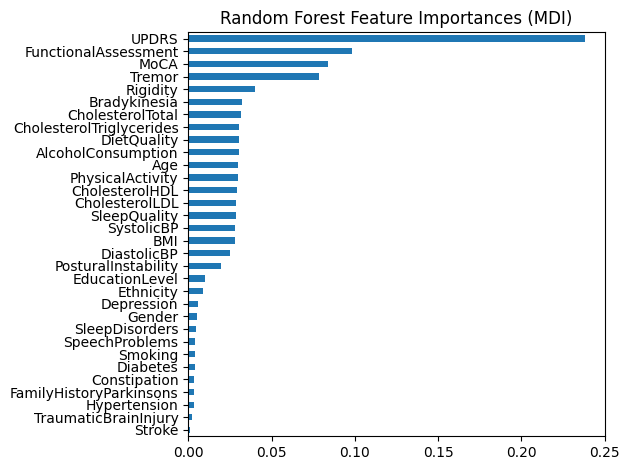

In [53]:
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

- Numerical features are being shown as most important due to more no of unique values. Therefore, permutation importances are checked using visualization.

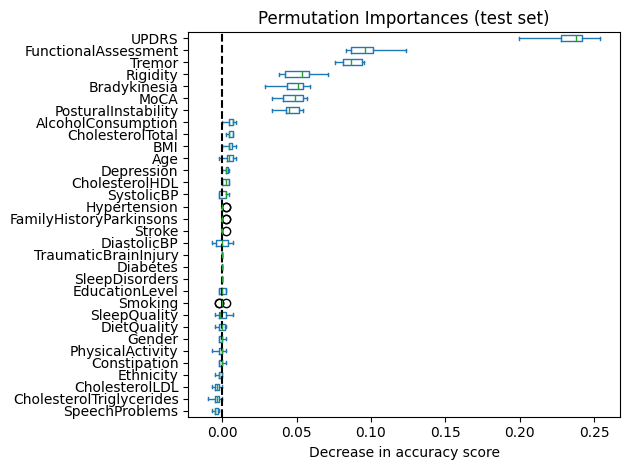

In [54]:
# Permutation importance on test set
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

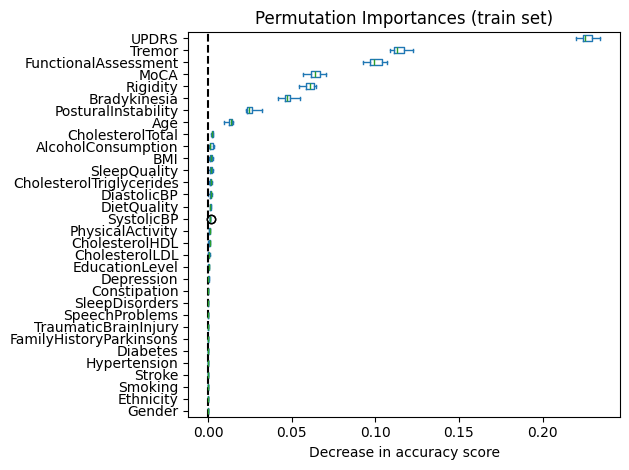

In [55]:
#permutation importance on train set
result = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [56]:
rf.set_params(classifier__min_samples_leaf=20).fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-2),
                                                  ['Gender', 'Ethnicity',
                                                   'EducationLevel', 'Smoking',
                                                   'FamilyHistoryParkinsons',
                                                   'TraumaticBrainInjury',
                                                   'Hypertension', 'Diabetes',
                                                   'Depression', 'Stroke',
                                                   'Tremor', 'Rigidity',
                                                   'Bradykinesia',
                                                   'Postur...
                                                 ('num', SimpleImputer(),
                                                  ['Age', 'BMI', 'SystolicBP',
                                                   'DiastolicBP',
                                                   'CholesterolTotal',
                                                   'CholesterolLDL',
                                                   'CholesterolHDL',
                                                   'CholesterolTriglycerides',
                                                   'UPDRS', 'MoCA',
                                                   'FunctionalAssessment',
                                                   'AlcoholConsumption',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=20, random_state=42))])

In [57]:
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")


RF train accuracy: 0.941
RF test accuracy: 0.903


#### Closeness in the scores of the test and train indicate overfitting is not present.

In [62]:
import joblib

joblib.dump(rf, 'pipeline.pkl')

['pipeline.pkl']